# 1. IMPORT MODULES AND DEFINE VARIABLES

In [267]:
import inference
import clustering
import importlib
import loadSaveData
importlib.reload(inference)
importlib.reload(clustering)
importlib.reload(loadSaveData)
pathTrain= '../Datasets/Suicide_Detection_train10000(test2000).csv'
pathTest='../Datasets/test.csv'

# 2. LOAD TRAIN AND CREATE OR LOAD TEST EMBEDDINGS

In [268]:
train=loadSaveData.loadEmbeddings(length=10000,dimension=768,type='bert')

Cargando embeddings...
Embeddings cargados


In [269]:
test=inference.create_test_embeddings()
print(len(test))

Cargando embeddings...
Embeddings cargados
4


In [106]:
test= loadSaveData.loadEmbeddings(length=4,dimension=768,type='bert')

Cargando embeddings...
Embeddings cargados


# 3. CLUSTERING

## 3.1. DBSCAN ORIGINAL

In [270]:
clusters=loadSaveData.loadClusters('DBScan8Clusters')
print(clusters)

[ 0 -1 -1 ... -1 -1  0]


BUSCAR INDICES DE INSTANCIAS TRAIN DEL CLUSTER X

In [271]:
instancias_clusterX_train=inference.buscar_instancias_cluster(clusters,4)
print(instancias_clusterX_train)

[908, 1538, 2235, 3106, 3476, 6173, 6473, 8141]


IMPRIMIR INSTANCIA TRAIN

In [272]:
instancia_test=inference.imprimir_instancia(pathTrain,908)
print(instancia_test)

I can't go onI've been thinking about it for awhile. The pain is just too much now. I spend every night crying myself to sleep. I've made decisions that affect my life drastically that I regret, but I can't go back on. I am not strong enough to continue on. 


AÑADIR AL TEST LAS INSTANCIAS TRAIN QUE NOS INTERESAN

In [273]:
# 2 del cluster 4 (suicide), 2 instancias del cluster 3 (links)
instances_to_add=[908,1538,1894, 2202]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

8


ASIGNAR CLUSTERS AL TEST

In [274]:
clusters_test=inference.asignar_cluster_test_coseno(train,test,clusters)
print(clusters_test)

[-1, -1, -1, -1, 4, 4, 3, 3]


BUSCAR INDICES DE INSTANCIAS TEST DEL CLUSTER X

In [275]:
instancias_clusterX_test=inference.buscar_instancias_cluster(clusters_test,-1)
print(instancias_clusterX_test)

[0, 1, 2, 3]


CALCULAR DISTANCIAS INSTANCIA X

In [276]:
inference.distancias_instancia_i_coseno(train,test,pathTrain,pathTest,0,kInstancias=1)

TEXTO INSTANCIA TEST:  https://egela.ehu.eus/login/index.php
DISTANCIAS [0.08638364 0.0482446  0.05511296 ... 0.05617815 0.05199772 0.11761403]
----------------------------------------------------------------
INDICE INSTANCIA TRAIN:  5047 , DISTANCIA:  0.015028298
TEXTO:  whhduduehdhttps://wad.ojooo.com/register.php?ref=Mojito


REDUCIR DIMENSIONES - 2D

In [277]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (8, 768)
Dim test after PCA:  (8, 2)


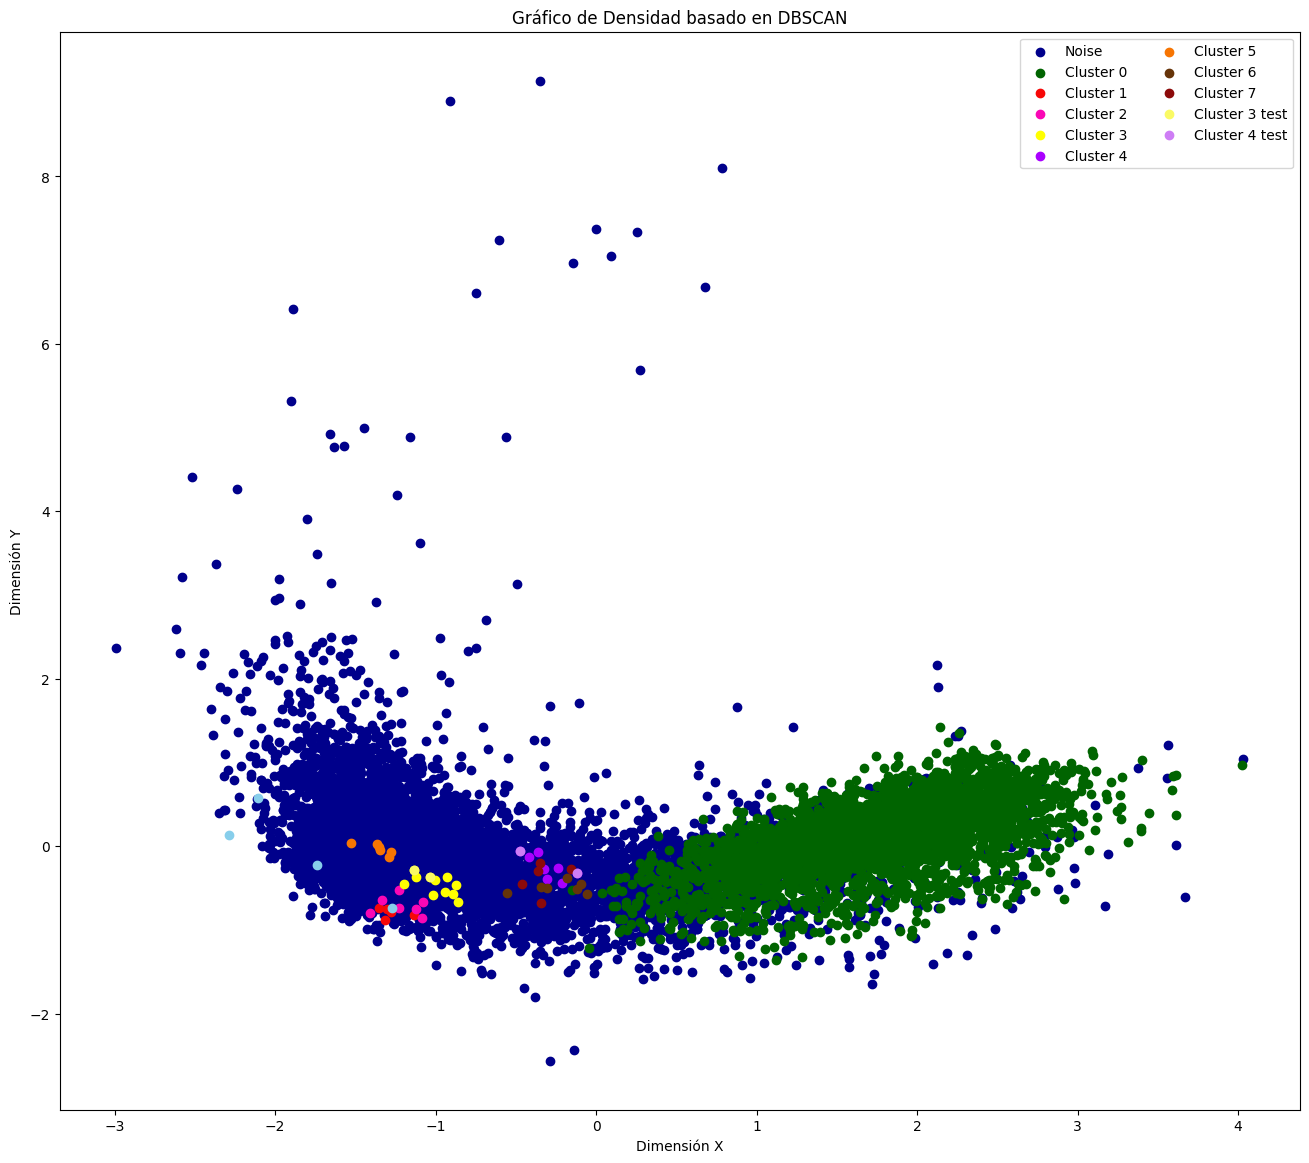

In [278]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test)

REDUCIR DIMENSIONES - 3D

In [279]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (8, 768)
Dim test after PCA:  (8, 3)


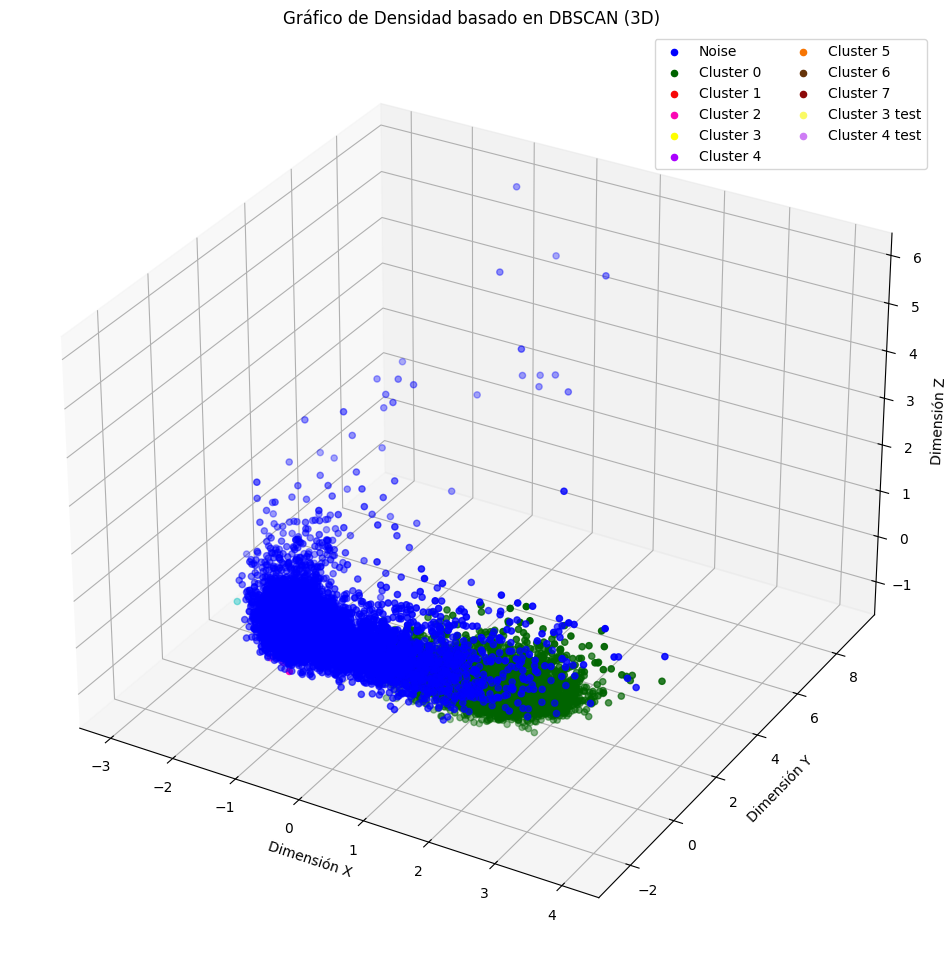

In [280]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test)

## 3.2. DBSCAN IMPLEMENTADO

In [251]:
clusters=loadSaveData.loadClusters('Urruela12Clusters')
print(clusters)

[0 1 1 ... 1 1 0]


BUSCAR INDICES DE INSTANCIAS TRAIN DEL CLUSTER X

In [253]:
instancias_clusterX_train=inference.buscar_instancias_cluster(clusters,2)
print(instancias_clusterX_train)

[38, 360, 397, 407, 451, 761, 1002, 1023, 1202, 1257, 1345, 1467, 1492, 1811, 1823, 1853, 2097, 2141, 2407, 2411, 2612, 2675, 2845, 3101, 3778, 3917, 3971, 4511, 4556, 4852, 5023, 5059, 5417, 5506, 5510, 5970, 6273, 6498, 6502, 6508, 6594, 6623, 6980, 7010, 7168, 7201, 7406, 7649, 7708, 7825, 7915, 8062, 8411, 8548, 8892, 8954, 8977, 9195, 9291, 9294, 9464, 9851, 9859, 9988]


IMPRIMIR INSTANCIA TRAIN

In [254]:
instancia_test=inference.imprimir_instancia(pathTrain,397)
print(instancia_test)

My wife wants a divorce.. 

My wife and I are splitting up. Its because of years of me choosing weed over my family like my sons birthday, my anniversary, all of it... It's all my fault. The women that I spent 5 years of my life married too, had a wonderful unbelievably amazing daughter and son with.. Idk how to do this.

All I want is to kill myself. I don't want to think about.. splitting up material bullshit.. or .. fuck man.. or even how we're suppose to talk to each other now. I'm madly in love with this woman but.. somehow it wasn't enough to overcome my own selfishness. I've ruined the only thing I've ever wanted, a real family. I don't know where I'm suppose to go.. how do I drive now that I'm leaving her with the car, the bills, the kids, my heart, fuck... everything is with this woman. I couldn't stand to see her happy with someone else, but I do wish her nothing but happiness. I just.. she's been kissing me and I was just told its because I want it. She doesn't even want to 

AÑADIR AL TEST LAS INSTANCIAS TRAIN QUE NOS INTERESAN

In [255]:
# 2 instancias cluster 2 (suicidio) y 2 del cluster 4 (links)
instances_to_add=[360, 397,603, 623]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

8


ASIGNAR CLUSTERS AL TEST

In [256]:
clusters_test=inference.asignar_cluster_test_euclidea(train,test,clusters)
print(clusters_test)

[7, 1, 1, 1, 2, 2, 4, 4]


BUSCAR INDICES DE INSTANCIAS TEST DEL CLUSTER X

In [257]:
instancias_clusterX_test=inference.buscar_instancias_cluster(clusters_test,7)
print(instancias_clusterX_test)

[0]


DISTANCIAS A INSTANCIA TRAIN MAS CERCANA

In [258]:
inference.distancias_instancia_i_euclidea(train,test,pathTrain,pathTest,0,kInstancias=1)

TEXTO INSTANCIA TEST:  https://egela.ehu.eus/login/index.php
DISTANCIAS [3.8828495, 2.8503158, 3.0890634, 2.6284986, 4.943912, 4.304572, 4.565139, 2.8124228, 4.067663, 4.29986, 2.945949, 3.156388, 2.6957135, 4.463792, 2.5836847, 2.5460825, 4.2688465, 2.7083502, 2.4326448, 3.1321628, 4.150938, 2.6755846, 5.5900483, 4.7064934, 3.6022398, 2.6060648, 3.776644, 3.9857612, 3.0417402, 2.9619632, 2.8805242, 4.740589, 2.6238494, 4.032132, 2.7911913, 2.9125183, 4.1492004, 4.233615, 5.144475, 2.7705514, 2.92348, 3.2160878, 4.267238, 2.520307, 4.5013123, 3.0908368, 3.1972554, 3.432292, 3.0593736, 2.7716901, 4.5289693, 3.6296165, 2.7131426, 3.44736, 4.091698, 2.856484, 3.1102257, 3.3318794, 2.8020465, 3.2221382, 2.5447657, 4.1187725, 4.0201764, 3.7395444, 3.0044208, 2.9142563, 3.9456878, 4.0489845, 2.74967, 3.892106, 3.7847922, 4.317869, 4.566566, 4.657372, 2.5753098, 4.1304026, 2.8079414, 2.7676377, 5.188053, 4.802987, 3.2054958, 3.6342447, 3.389453, 4.7633023, 3.0860908, 2.1866882, 2.648643, 4.60

REDUCIR DIMENSIONES - 2D

In [259]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (8, 768)
Dim test after PCA:  (8, 2)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

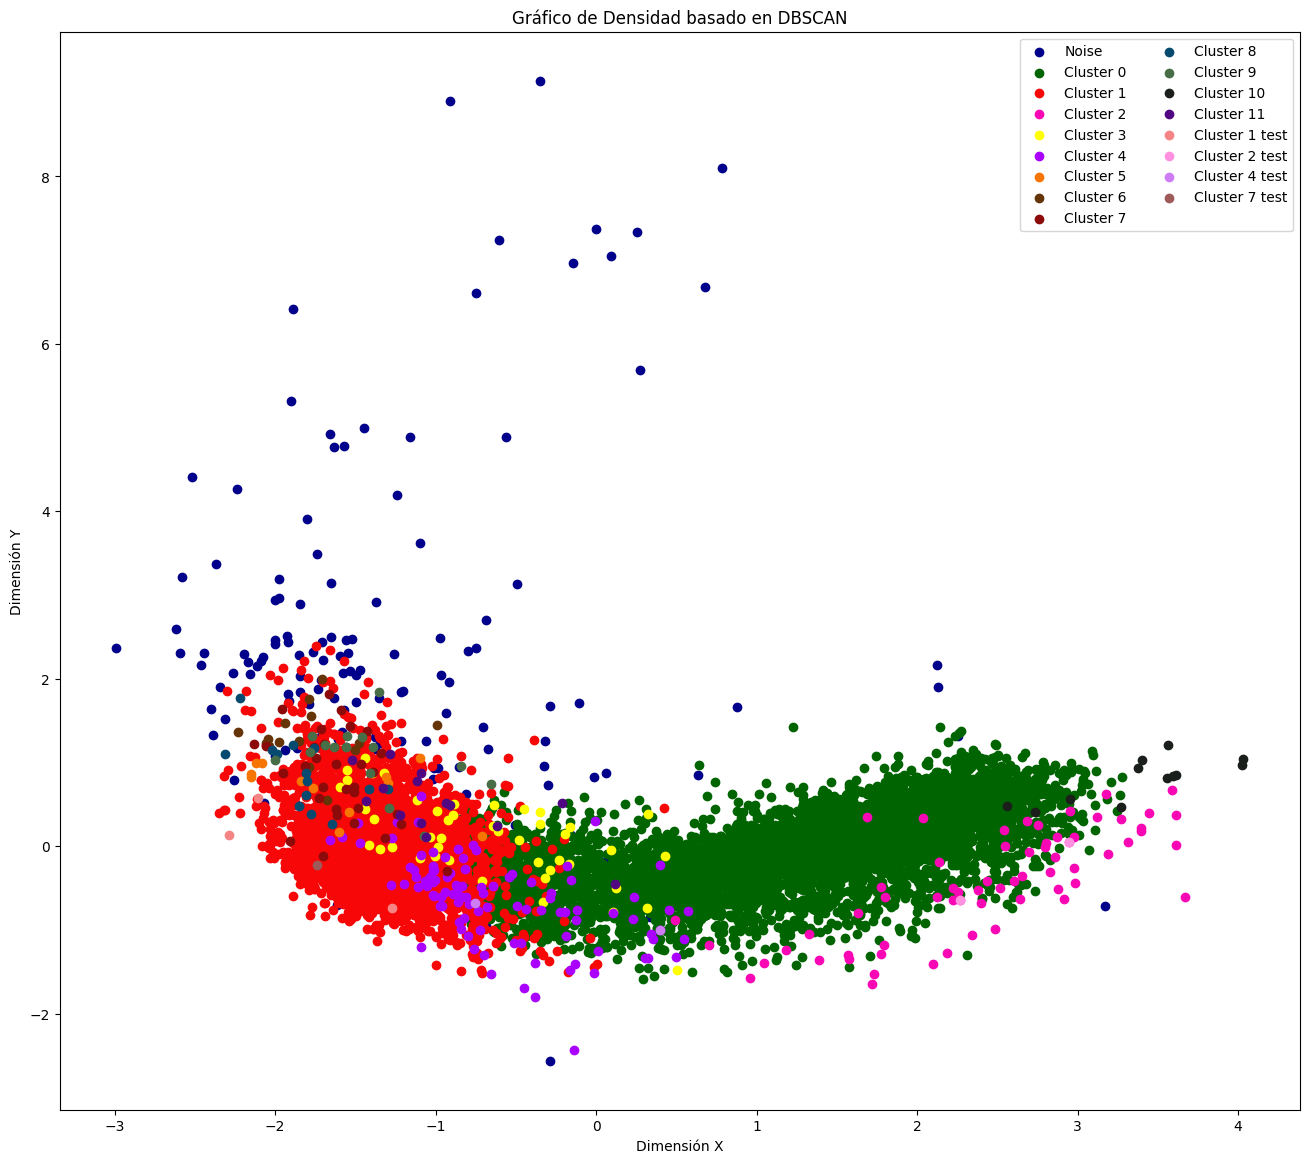

In [266]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test)

REDUCIR DIMENSIONES - 3D

In [263]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (8, 768)
Dim test after PCA:  (8, 3)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

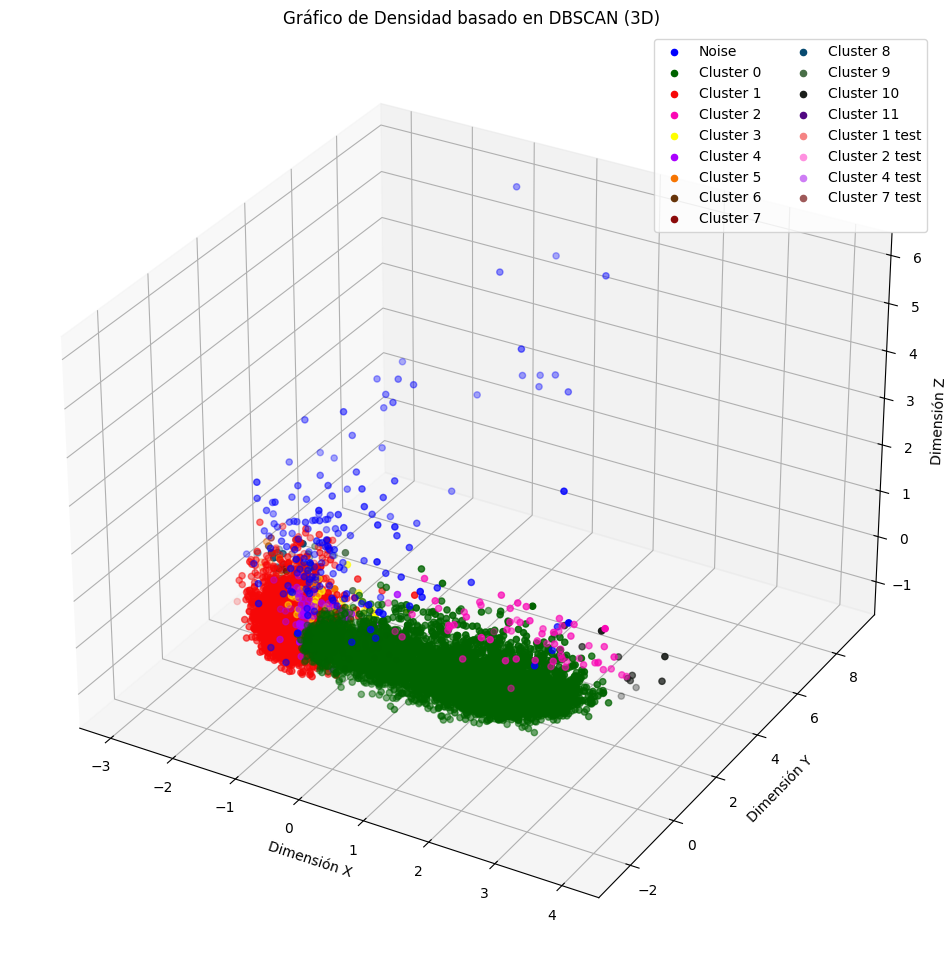

In [264]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test)